# Temporal Difference Learning Methods for Control

## Sarsa: GPI with TD

### The Sarsa algorithm

- Sarsa

$$
Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \alpha (R_{t+1}+\gamma Q(S_{t+1},A_{t+1})-Q(S_t,A_t))
$$

- Recall: TD

$$
V(S_t) \leftarrow V(S_t) + \alpha (R_{t+1} + \gamma V(S_{t+1}) - V(S_t))
$$

- We can combine *generalized policy iteration* with *TD learning* to find *improved policies*
- *Sarsa* is an *action-value* form of TD which combines these ideas


## Example: Windy Gridworld



In [2]:
#######################################################################
# Copyright (C)                                                       #
# 2016-2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)             #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# world height
WORLD_HEIGHT = 7

# world width
WORLD_WIDTH = 10

# wind strength for each column
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

# possible actions
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3

# probability for exploration
EPSILON = 0.1

# Sarsa step size
ALPHA = 0.5

# reward for each step
REWARD = -1.0

START = [3, 0]
GOAL = [3, 7]
ACTIONS = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT]

def step(state, action):
    i, j = state
    if action == ACTION_UP:
        return [max(i - 1 - WIND[j], 0), j]
    elif action == ACTION_DOWN:
        return [max(min(i + 1 - WIND[j], WORLD_HEIGHT - 1), 0), j]
    elif action == ACTION_LEFT:
        return [max(i - WIND[j], 0), max(j - 1, 0)]
    elif action == ACTION_RIGHT:
        return [max(i - WIND[j], 0), min(j + 1, WORLD_WIDTH - 1)]
    else:
        assert False

# play for an episode
def episode(q_value):
    # track the total time steps in this episode
    time = 0

    # initialize state
    state = START

    # choose an action based on epsilon-greedy algorithm
    if np.random.binomial(1, EPSILON) == 1:
        action = np.random.choice(ACTIONS)
    else:
        values_ = q_value[state[0], state[1], :]
        action = np.random.choice([action_ for action_, value_ in enumerate(values_) if value_ == np.max(values_)])

    # keep going until get to the goal state
    while state != GOAL:
        next_state = step(state, action)
        if np.random.binomial(1, EPSILON) == 1:
            next_action = np.random.choice(ACTIONS)
        else:
            values_ = q_value[next_state[0], next_state[1], :]
            next_action = np.random.choice([action_ for action_, value_ in enumerate(values_) if value_ == np.max(values_)])

        # Sarsa update
        q_value[state[0], state[1], action] += \
            ALPHA * (REWARD + q_value[next_state[0], next_state[1], next_action] -
                     q_value[state[0], state[1], action])
        state = next_state
        action = next_action
        time += 1
    return time

Optimal policy is:
['U', 'R', 'R', 'R', 'D', 'R', 'R', 'R', 'R', 'D']
['R', 'R', 'R', 'R', 'R', 'R', 'D', 'D', 'R', 'D']
['R', 'R', 'R', 'R', 'R', 'U', 'R', 'R', 'R', 'D']
['R', 'R', 'R', 'R', 'U', 'R', 'R', 'G', 'R', 'D']
['D', 'U', 'R', 'R', 'R', 'R', 'U', 'D', 'L', 'L']
['D', 'R', 'U', 'R', 'R', 'U', 'U', 'D', 'L', 'R']
['D', 'R', 'R', 'R', 'U', 'U', 'U', 'U', 'U', 'L']
Wind strength for each column:
['0', '0', '0', '1', '1', '1', '2', '2', '1', '0']


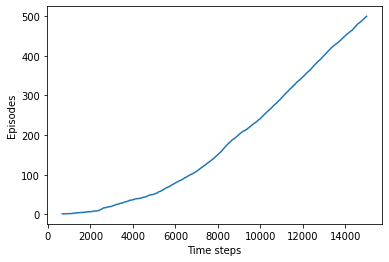

In [3]:
q_value = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
episode_limit = 500

steps = []
ep = 0
while ep < episode_limit:
    steps.append(episode(q_value))
    # time = episode(q_value)
    # episodes.extend([ep] * time)
    ep += 1

steps = np.add.accumulate(steps)

plt.plot(steps, np.arange(1, len(steps) + 1))
plt.xlabel('Time steps')
plt.ylabel('Episodes')

# display the optimal policy
optimal_policy = []
for i in range(0, WORLD_HEIGHT):
    optimal_policy.append([])
    for j in range(0, WORLD_WIDTH):
        if [i, j] == GOAL:
            optimal_policy[-1].append('G')
            continue
        bestAction = np.argmax(q_value[i, j, :])
        if bestAction == ACTION_UP:
            optimal_policy[-1].append('U')
        elif bestAction == ACTION_DOWN:
            optimal_policy[-1].append('D')
        elif bestAction == ACTION_LEFT:
            optimal_policy[-1].append('L')
        elif bestAction == ACTION_RIGHT:
            optimal_policy[-1].append('R')
print('Optimal policy is:')
for row in optimal_policy:
    print(row)
print('Wind strength for each column:\n{}'.format([str(w) for w in WIND]))



## The Q-learning algorithm

$$
Q(S,A) \leftarrow Q(S,A) + \alpha (R+\gamma \max_a Q(S',a)-Q(S,A))
$$

## Revisiting Bellman equations

- Sarsa

$$
\begin{gather*}
Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \alpha (R_{t+1}+\gamma Q(S_{t+1},A_{t+1})-Q(S_t,A_t)) \\
q_\pi(s,a)=\sum_{s',r}p(s',r|s,a) \left( r+\gamma\sum_{a'}\pi(a'|s')q_\pi(s',a') \right)
\end{gather*}
$$

- Q-learning

$$
\begin{gather*}
Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \alpha (R_{t+1}+\gamma \max_{a'}Q(S_{t+1},a')-Q(S_t,A_t))\\
q_\star(s,a)=\sum_{s',r}p(s',r|s,a) \left( r+\gamma \max_{a'} q_\pi(s',a') \right)
\end{gather*}
$$

## Connections to Dynamic Programming

- *Sarsa $\sim$ Policy Iteration*
- *Q-learning $\sim$ Value Iteration*

## Example: Cliff Walking

In [4]:
#######################################################################
# Copyright (C)                                                       #
# 2016-2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)             #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from tqdm import tqdm

# world height
WORLD_HEIGHT = 4

# world width
WORLD_WIDTH = 12

# probability for exploration
EPSILON = 0.1

# step size
ALPHA = 0.5

# gamma for Q-Learning and Expected Sarsa
GAMMA = 1

# all possible actions
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3
ACTIONS = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT]

# initial state action pair values
START = [3, 0]
GOAL = [3, 11]

def step(state, action):
    i, j = state
    if action == ACTION_UP:
        next_state = [max(i - 1, 0), j]
    elif action == ACTION_LEFT:
        next_state = [i, max(j - 1, 0)]
    elif action == ACTION_RIGHT:
        next_state = [i, min(j + 1, WORLD_WIDTH - 1)]
    elif action == ACTION_DOWN:
        next_state = [min(i + 1, WORLD_HEIGHT - 1), j]
    else:
        assert False

    reward = -1
    if (action == ACTION_DOWN and i == 2 and 1 <= j <= 10) or (
        action == ACTION_RIGHT and state == START):
        reward = -100
        next_state = START

    return next_state, reward

# reward for each action in each state
# actionRewards = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
# actionRewards[:, :, :] = -1.0
# actionRewards[2, 1:11, ACTION_DOWN] = -100.0
# actionRewards[3, 0, ACTION_RIGHT] = -100.0

# set up destinations for each action in each state
# actionDestination = []
# for i in range(0, WORLD_HEIGHT):
#     actionDestination.append([])
#     for j in range(0, WORLD_WIDTH):
#         destinaion = dict()
#         destinaion[ACTION_UP] = [max(i - 1, 0), j]
#         destinaion[ACTION_LEFT] = [i, max(j - 1, 0)]
#         destinaion[ACTION_RIGHT] = [i, min(j + 1, WORLD_WIDTH - 1)]
#         if i == 2 and 1 <= j <= 10:
#             destinaion[ACTION_DOWN] = START
#         else:
#             destinaion[ACTION_DOWN] = [min(i + 1, WORLD_HEIGHT - 1), j]
#         actionDestination[-1].append(destinaion)
# actionDestination[3][0][ACTION_RIGHT] = START

# choose an action based on epsilon greedy algorithm
def choose_action(state, q_value):
    if np.random.binomial(1, EPSILON) == 1:
        return np.random.choice(ACTIONS)
    else:
        values_ = q_value[state[0], state[1], :]
        return np.random.choice([action_ for action_, value_ in enumerate(values_) if value_ == np.max(values_)])

# an episode with Sarsa
# @q_value: values for state action pair, will be updated
# @expected: if True, will use expected Sarsa algorithm
# @step_size: step size for updating
# @return: total rewards within this episode
def sarsa(q_value, expected=False, step_size=ALPHA):
    state = START
    action = choose_action(state, q_value)
    rewards = 0.0
    while state != GOAL:
        next_state, reward = step(state, action)
        next_action = choose_action(next_state, q_value)
        rewards += reward
        if not expected:
            target = q_value[next_state[0], next_state[1], next_action]
        else:
            # calculate the expected value of new state
            target = 0.0
            q_next = q_value[next_state[0], next_state[1], :]
            best_actions = np.argwhere(q_next == np.max(q_next))
            for action_ in ACTIONS:
                if action_ in best_actions:
                    target += ((1.0 - EPSILON) / len(best_actions) + EPSILON / len(ACTIONS)) * q_value[next_state[0], next_state[1], action_]
                else:
                    target += EPSILON / len(ACTIONS) * q_value[next_state[0], next_state[1], action_]
        target *= GAMMA
        q_value[state[0], state[1], action] += step_size * (
                reward + target - q_value[state[0], state[1], action])
        state = next_state
        action = next_action
    return rewards

# an episode with Q-Learning
# @q_value: values for state action pair, will be updated
# @step_size: step size for updating
# @return: total rewards within this episode
def q_learning(q_value, step_size=ALPHA):
    state = START
    rewards = 0.0
    while state != GOAL:
        action = choose_action(state, q_value)
        next_state, reward = step(state, action)
        rewards += reward
        # Q-Learning update
        q_value[state[0], state[1], action] += step_size * (
                reward + GAMMA * np.max(q_value[next_state[0], next_state[1], :]) -
                q_value[state[0], state[1], action])
        state = next_state
    return rewards

# print optimal policy
def print_optimal_policy(q_value):
    optimal_policy = []
    for i in range(0, WORLD_HEIGHT):
        optimal_policy.append([])
        for j in range(0, WORLD_WIDTH):
            if [i, j] == GOAL:
                optimal_policy[-1].append('G')
                continue
            bestAction = np.argmax(q_value[i, j, :])
            if bestAction == ACTION_UP:
                optimal_policy[-1].append('U')
            elif bestAction == ACTION_DOWN:
                optimal_policy[-1].append('D')
            elif bestAction == ACTION_LEFT:
                optimal_policy[-1].append('L')
            elif bestAction == ACTION_RIGHT:
                optimal_policy[-1].append('R')
    for row in optimal_policy:
        print(row)

100%|██████████| 50/50 [00:47<00:00,  1.04it/s]
Sarsa Optimal Policy:
['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
['U', 'U', 'L', 'R', 'R', 'R', 'R', 'U', 'R', 'U', 'R', 'D']
['U', 'U', 'R', 'R', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'D']
['U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'G']
Q-Learning Optimal Policy:
['L', 'R', 'U', 'R', 'R', 'R', 'R', 'U', 'L', 'D', 'R', 'D']
['R', 'D', 'R', 'R', 'R', 'R', 'R', 'D', 'R', 'R', 'R', 'D']
['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
['U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'G']


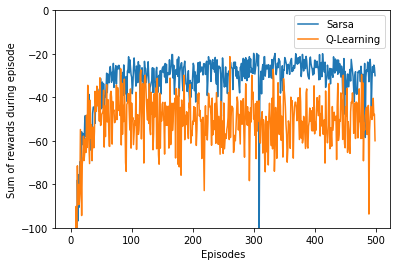

In [5]:
# Use multiple runs instead of a single run and a sliding window
# With a single run I failed to present a smooth curve
# However the optimal policy converges well with a single run
# Sarsa converges to the safe path, while Q-Learning converges to the optimal path

# episodes of each run
episodes = 500

# perform 40 independent runs
runs = 50

rewards_sarsa = np.zeros(episodes)
rewards_q_learning = np.zeros(episodes)
for r in tqdm(range(runs)):
    q_sarsa = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
    q_q_learning = np.copy(q_sarsa)
    for i in range(0, episodes):
        # cut off the value by -100 to draw the figure more elegantly
        # rewards_sarsa[i] += max(sarsa(q_sarsa), -100)
        # rewards_q_learning[i] += max(q_learning(q_q_learning), -100)
        rewards_sarsa[i] += sarsa(q_sarsa)
        rewards_q_learning[i] += q_learning(q_q_learning)

# averaging over independt runs
rewards_sarsa /= runs
rewards_q_learning /= runs

# draw reward curves
plt.plot(rewards_sarsa, label='Sarsa')
plt.plot(rewards_q_learning, label='Q-Learning')
plt.xlabel('Episodes')
plt.ylabel('Sum of rewards during episode')
plt.ylim([-100, 0])
plt.legend()

# display optimal policy
print('Sarsa Optimal Policy:')
print_optimal_policy(q_sarsa)
print('Q-Learning Optimal Policy:')
print_optimal_policy(q_q_learning)



## Expected Sarsa

$$
\begin{gather*}
Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \alpha (R_{t+1}+\gamma \sum_{a'}\pi(a'|S_{t+1})Q(S_{t+1},a')-Q(S_t,A_t)) \\
\end{gather*}
$$

- The *Expected Sarsa* algorithm explicitly computes the *expectation under its policy*, which is more expensive than sampling but has *lower variance*


## Expected Sarsa in the Cliff World

- *Expected Sarsa* is able to quickly learn a good policy in the cliff-World
- *Expected Sarsa* is more robust to large step-sizes than *Sarsa*

## Genearlity of Expected Sarsa

- *Expected Sarsa* uses the same techniques as *Q-learning* to learn *off-policy* without *importance sampling*
- *Expected Sarsa* with a *target policy* that's *greedy* with respect to its action-values is exactly *Q-learning*


100%|██████████| 10/10 [00:36<00:00,  3.69s/it]


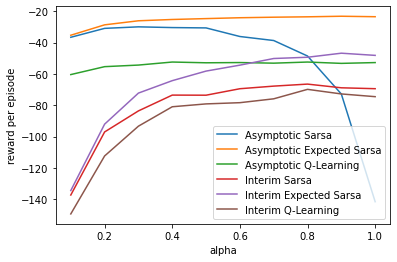

In [6]:
# Due to limited capacity of calculation of my machine, I can't complete this experiment
# with 100,000 episodes and 50,000 runs to get the fully averaged performance
# However even I only play for 1,000 episodes and 10 runs, the curves looks still good.

step_sizes = np.arange(0.1, 1.1, 0.1)
episodes = 1000
runs = 10

ASY_SARSA = 0
ASY_EXPECTED_SARSA = 1
ASY_QLEARNING = 2
INT_SARSA = 3
INT_EXPECTED_SARSA = 4
INT_QLEARNING = 5
methods = range(0, 6)

performace = np.zeros((6, len(step_sizes)))
for run in range(runs):
    for ind, step_size in tqdm(list(zip(range(0, len(step_sizes)), step_sizes))):
        q_sarsa = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
        q_expected_sarsa = np.copy(q_sarsa)
        q_q_learning = np.copy(q_sarsa)
        for ep in range(episodes):
            sarsa_reward = sarsa(q_sarsa, expected=False, step_size=step_size)
            expected_sarsa_reward = sarsa(q_expected_sarsa, expected=True, step_size=step_size)
            q_learning_reward = q_learning(q_q_learning, step_size=step_size)
            performace[ASY_SARSA, ind] += sarsa_reward
            performace[ASY_EXPECTED_SARSA, ind] += expected_sarsa_reward
            performace[ASY_QLEARNING, ind] += q_learning_reward

            if ep < 100:
                performace[INT_SARSA, ind] += sarsa_reward
                performace[INT_EXPECTED_SARSA, ind] += expected_sarsa_reward
                performace[INT_QLEARNING, ind] += q_learning_reward

performace[:3, :] /= episodes * runs
performace[3:, :] /= 100 * runs
labels = ['Asymptotic Sarsa', 'Asymptotic Expected Sarsa', 'Asymptotic Q-Learning',
          'Interim Sarsa', 'Interim Expected Sarsa', 'Interim Q-Learning']

for method, label in zip(methods, labels):
    plt.plot(step_sizes, performace[method, :], label=label)
plt.xlabel('alpha')
plt.ylabel('reward per episode')
plt.legend()
